<a href="https://colab.research.google.com/github/lisabroadhead/data_science_machine-learning/blob/main/june_29_Random_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forests
- June 29, 2022

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
# Import random forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [4]:
file = '/content/drive/MyDrive/Colab Notebooks/coding_dojo/Machine Learning/files/cali_housing.csv'

df = pd.read_csv(file)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
y = df['MedHouseVal']
X = df.drop(columns='MedHouseVal')

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [9]:
rf = RandomForestRegressor(random_state=42)
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [11]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [12]:
rf.predict(X_test)

array([0.50262  , 0.7139   , 4.9008466, ..., 1.23913  , 3.0341205,
       4.1185512])

In [16]:
train_rf_score = rf.score(X_train, y_train)
test_rf_score = rf.score(X_test, y_test)

print(train_rf_score)
print(test_rf_score)

0.9726163038386978
0.8078655075367563


In [17]:
rf_9 = RandomForestRegressor(max_depth = 9, random_state = 42)
rf_9.fit(X_train, y_train)
rf_9_train_score = rf_9.score(X_train, y_train)
rf_9_test_score = rf_9.score(X_test, y_test)
print(rf_9_train_score)
print(rf_9_test_score)


0.8422908368094096
0.7659811625575986


In [18]:
est_depths = [estimator.get_depth() for estimator in rf.estimators_]
max(est_depths)


42

In [19]:
depths = range(1, max(est_depths))
scores = pd.DataFrame(index=depths, columns=['Test Score'])
for depth in depths:    
   model = RandomForestRegressor(max_depth=depth)
   model.fit(X_train, y_train)
   scores.loc[depth, 'Train Score'] = model.score(X_train, y_train)
   scores.loc[depth, 'Test Score'] = model.score(X_test, y_test)
   scores.head()


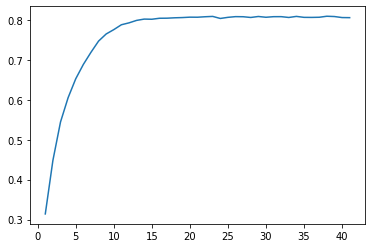

In [20]:
plt.plot(scores['Test Score'])


In [21]:
plt.plot(scores2['Test Score'])
plt.xticks(n_ests);

NameError: ignored